Урок 3. Введение в метрики, практика построения доверительного интервала

Задание 1. Изучение датасета

Изучите датасет в Jupyter Notebook и напишите ответы на вопросы. Аргументируйте их с помощью кода, который позволяет получить решение.
• Какие признаки численные?
• Какие признаки категориальные?
• Какие признаки имеют нормальное распределение?
• Какие признаки бессмысленные?

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579



Про Датасет

Датасет представляет собой информацию по жителям некоторого города.

    was_married - Был ли когда-либо женат/замужем
    children - Количество детей
    salary - Уровень зарплаты
    sex - Пол (0 - женщина, 1 - мужчина)
    age - Возраст
    home_cost - Сумарная стоимость жилья/недвижимости
    Professon - Профессия
    drive_info - Есть ли водительские права
    happyness - уровень счастья по результатам опроса



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB




В датасете 9 признаков. Они имеют следующие типы данных:

    Численные признаки (float64 и int64):
        was_married (int64)
        children (float64)
        salary (float64)
        sex (int64)
        age (float64)
        home_cost (float64)
        drive_info (float64)
        happyness (float64)

    Категориальные признаки:
        profession (object)



In [4]:
print(data["was_married"].value_counts())
print("\n", data["sex"].value_counts())
print("\n", data["drive_info"].value_counts())

was_married
1    5052
0     948
Name: count, dtype: int64

 sex
1    3971
0    2029
Name: count, dtype: int64

 drive_info
1.0    2355
0.0     875
Name: count, dtype: int64


Признаки was_married, sex и drive_info принимают одно из двух значений - не имеют нормального распределения

`children` - Количество детей


Text(0.5, 1.0, 'Боксплот')

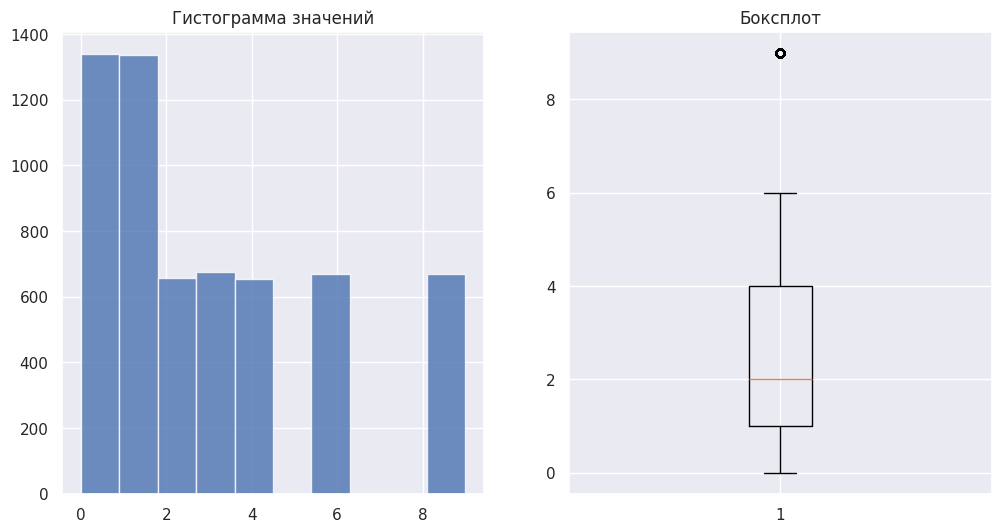

In [5]:
print("`children` - Количество детей")
plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(data["children"], alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(data["children"])
plt.title("Боксплот")

Признак children не имеет нормального распределения

`salary` - Уровень зарплаты


Text(0.5, 1.0, 'Боксплот')

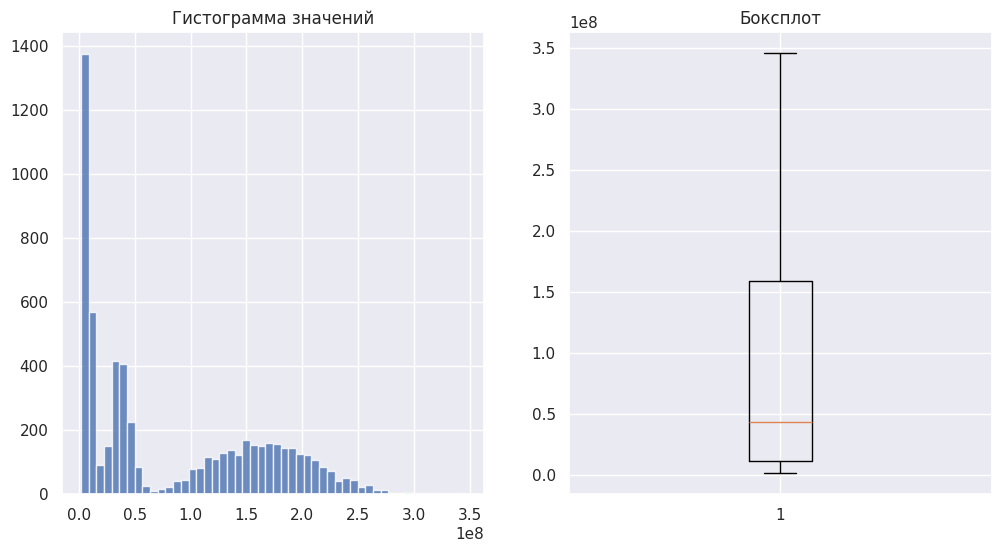

In [6]:
print("`salary` - Уровень зарплаты")
plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(data["salary"], bins=50, alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(data["salary"])
plt.title("Боксплот")

Признак salary не имеет нормального распределения

`age` - Возраст


Text(0.5, 1.0, 'Боксплот')

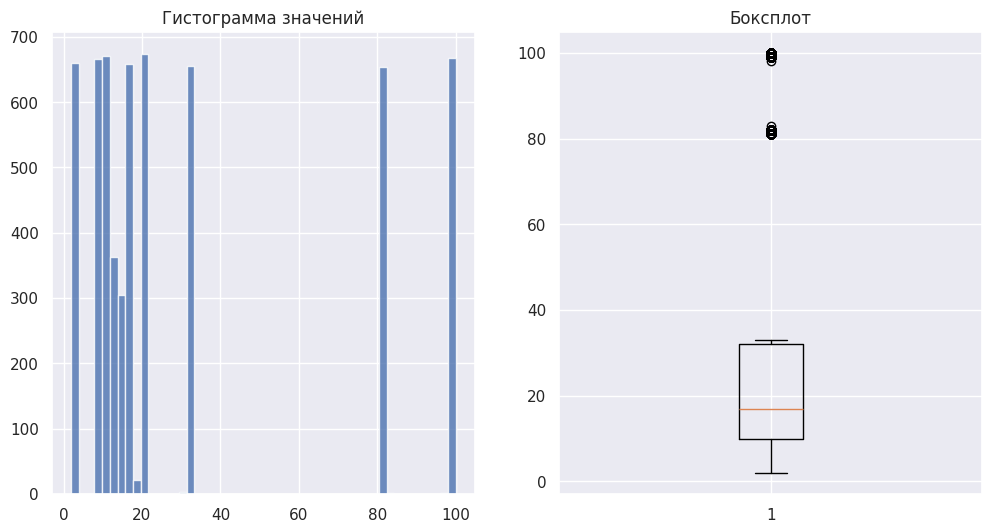

In [7]:
print("`age` - Возраст")
plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(data["age"], bins=50, alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(data["age"])
plt.title("Боксплот")

Признак age не имеет нормального распределения

`home_cost` - Сумарная стоимость жилья/недвижимости


Text(0.5, 1.0, 'Боксплот')

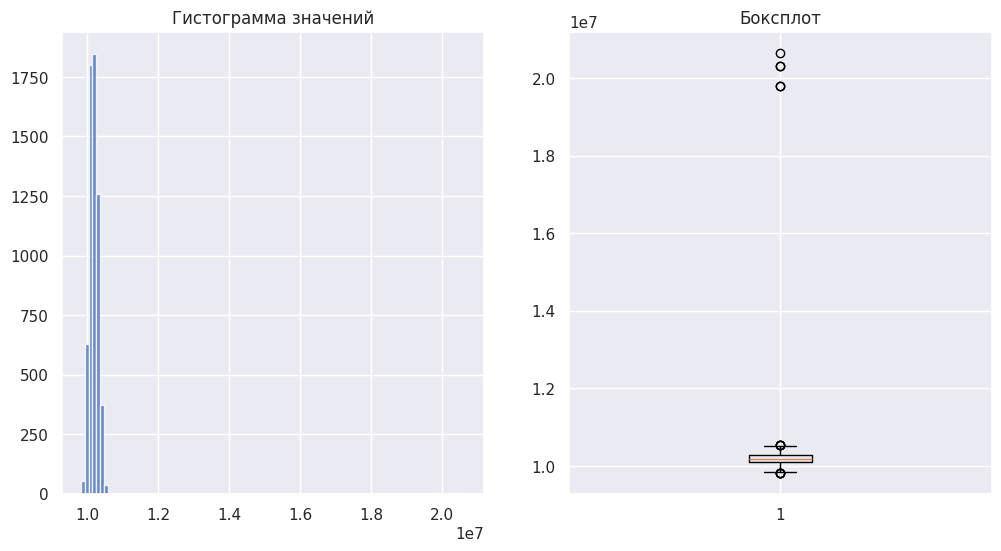

In [8]:
print("`home_cost` - Сумарная стоимость жилья/недвижимости")
plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(data["home_cost"], bins=100, alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(data["home_cost"])
plt.title("Боксплот")

Признак home_cost имеет нормальное распределение и несколько выбросов

`happyness` - уровень счастья по результатам опроса


Text(0.5, 1.0, 'Боксплот')

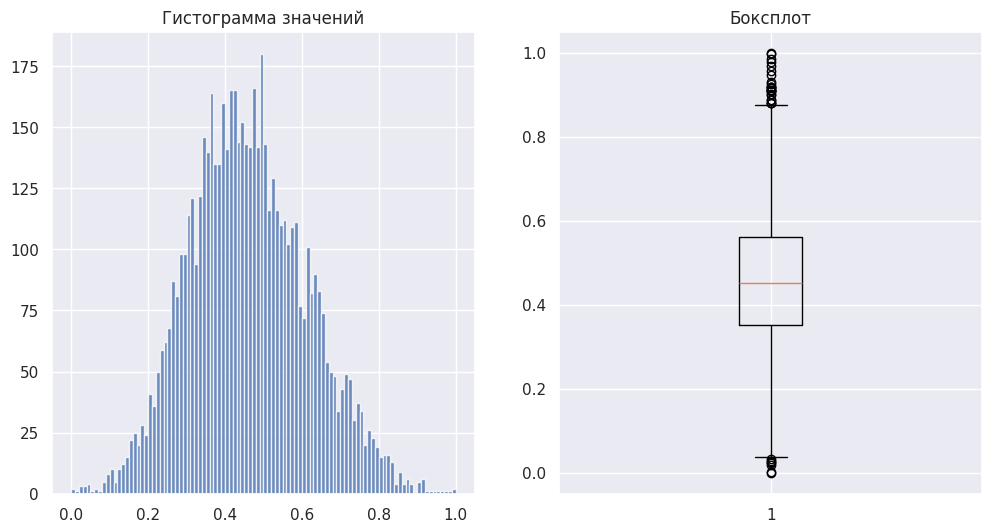

In [9]:
print("`happyness` - уровень счастья по результатам опроса")
plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(data["happyness"], bins=100, alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(data["happyness"])
plt.title("Боксплот")

Признак happyness имеет нормальное распределение и несколько выбросов

Задание 2. Чистка датасета

Изучите датасет в Jupyter Notebook и ответьте на вопросы.
• Есть ли дубли в данных? Если есть — удалите их (drop_duplicates).
• Есть ли пропуски в данных? Если есть — удалите столбцы, в которых они есть (dropna()).
• Найдите и удалите выбросы по признаку home_cost. Сколько выбросов вы нашли?


    Есть ли дубли в данных? Если есть - удалить их (drop_duplicates).
    Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
    Найти и удалить выбросы по признаку home_cost. Сколько их?


In [10]:
df = data.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [11]:
df = df.loc[:, df.notna().all(axis=0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   happyness    6000 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 421.9+ KB


Дублей в данных нет (после использования метода drop_duplicates() количество строк не уменьшилось)



Удалили столбец drive_info, в котором были пропуски данных


Удалено  600  выбросов


Text(0.5, 1.0, 'Боксплот')

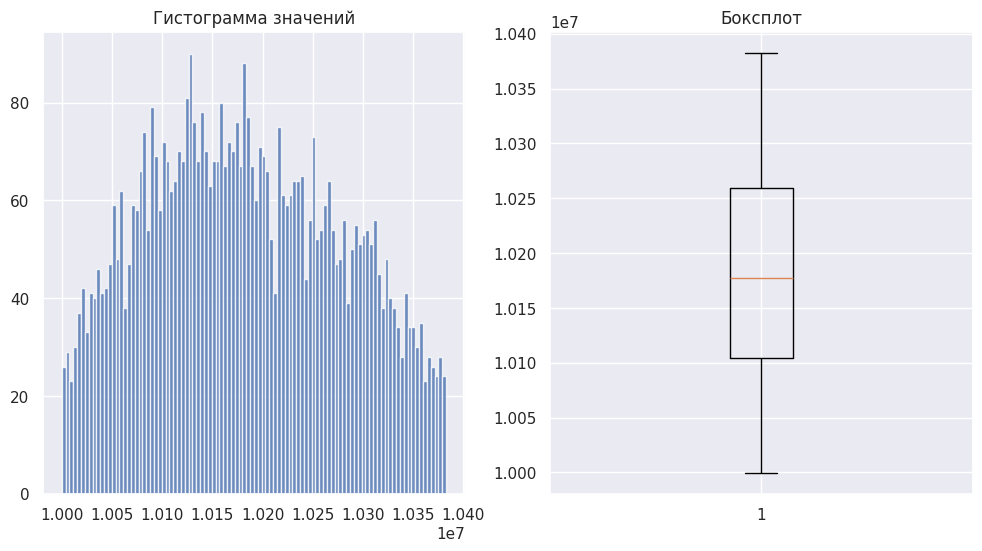

In [12]:
# Возьмем нормальные значения, которые лежат в пределах 0,05 < p-value < 0,95

n1 = np.quantile(df["home_cost"], 0.05)
n2 = np.quantile(df["home_cost"], 0.95)
n = len(df)

df = df.drop(df.loc[df["home_cost"] < n1].index)
df = df.drop(df.loc[df["home_cost"] > n2].index)

print("Удалено ", n - len(df), " выбросов")

plt.figure(figsize=(12, 6))
# Одна строка, два столбца. Текущая ячейка - 1
plt.subplot(1, 2, 1)
plt.hist(df["home_cost"], bins=100, alpha=0.8)
plt.title("Гистограмма значений")

# Одна строка, два столбца. Текущая ячейка - 2
plt.subplot(1, 2, 2)
plt.boxplot(df["home_cost"])
plt.title("Боксплот")

Задание 3. Проверка гипотез

Проверьте гипотезы для изученного датасета. Используйте визуализацию, чтобы доказать их. Обоснуйте свои ответы. Статистические методы использовать не нужно.
• Правда ли, что женщины в среднем имеют более высокую зарплату, чем мужчины?
• Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?
• Правда ли, что те, у кого больше трёх детей, зарабатывают в среднем больше, чем те, у кого меньше или трое детей?
• Правда ли, что художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?
• Правда ли, что недвижимость у тех, кто когда-либо был в браке, в среднем дороже, чем у тех, кто никогда не был в браке?
• Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины? - Нет, женщины в среднем имеют более низкую зарплату, чем мужчины

<Axes: xlabel='sex', ylabel='salary'>

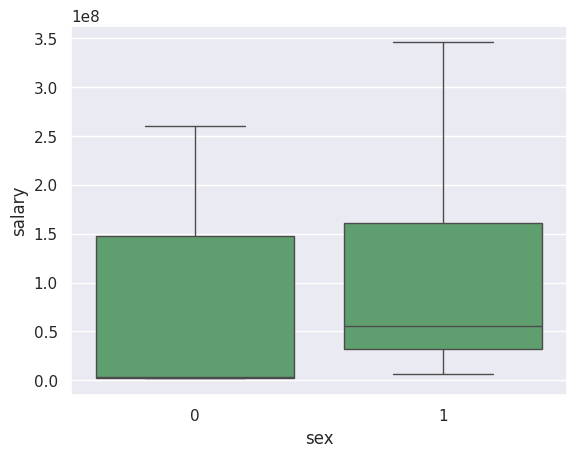

In [13]:
sns.boxplot(data=df, y="salary", color="g", x="sex")

Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)? - Нет, инженеры (Engineer) зарабатывают в среднем меньше, чем люди из сферы развлечений (Entertainment)

<Axes: xlabel='profession', ylabel='salary'>

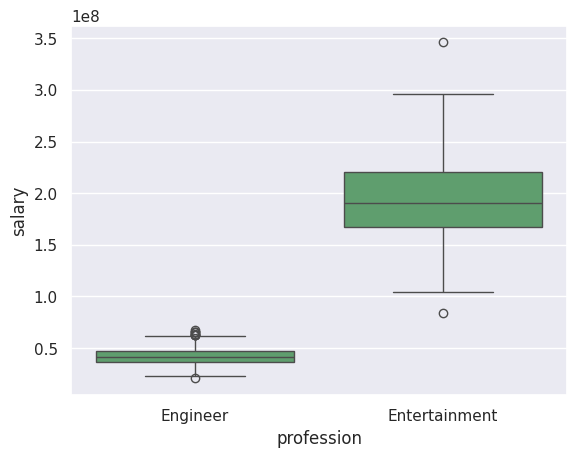

In [14]:
df1 = df.loc[((df.profession == "Engineer") | (df.profession == "Entertainment"))]
sns.boxplot(
    data=df1,
    y="salary",
    color="g",
    x="profession",
)

Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей? - Да, правда: те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей

<Axes: xlabel='c_children', ylabel='salary'>

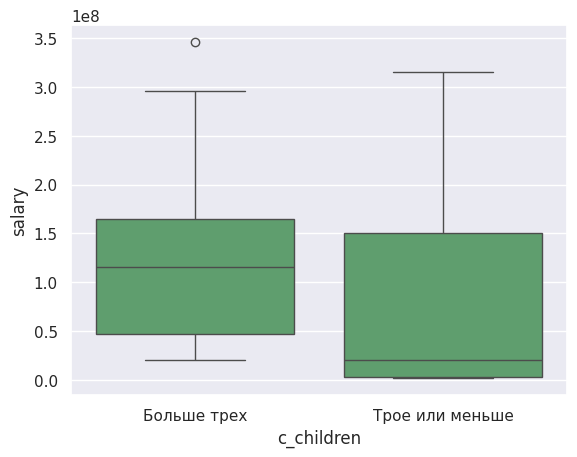

In [15]:
df1 = df.iloc[:, 1:3]

df1["c_children"] = [
    "Больше трех" if x > 3 else "Трое или меньше" for x in df1["children"]
]

sns.boxplot(data=df1, y="salary", color="g", x="c_children")

Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)? - Нет, не правда: дома художников (Artist) в среднем дешевле, чем дома адвокатов (Lawyer)

<Axes: xlabel='profession', ylabel='home_cost'>

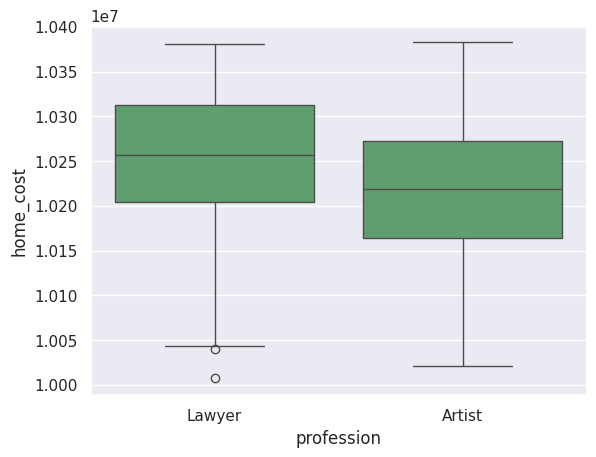

In [16]:
df1 = df.loc[((df.profession == "Artist") | (df.profession == "Lawyer"))]
sns.boxplot(
    data=df1,
    y="home_cost",
    color="g",
    x="profession",
)

Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке? - Нет, не правда: недвижимость у тех, кто когда либо был в браке в среднем дешевле, чем у тех, кто никогда не был в браке

<Axes: xlabel='was_married', ylabel='home_cost'>

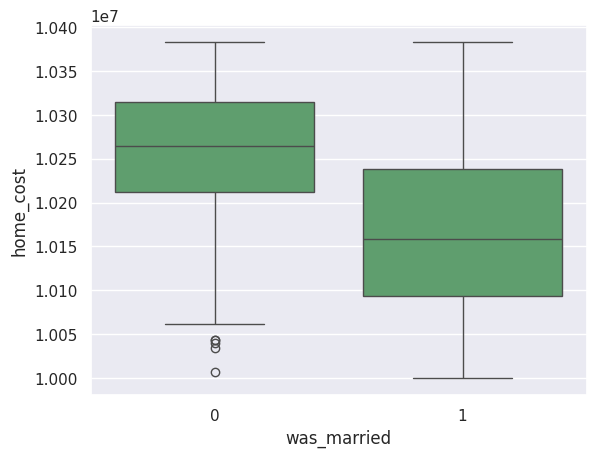

In [17]:
df1 = df.iloc[:, [0, 6]]
sns.boxplot(
    data=df1,
    y="home_cost",
    color="g",
    x="was_married",
)

Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины? - Да, правда: мужчины в среднем чаще бывают в браке, чем женщины

In [18]:
from itertools import count

df1 = pd.pivot_table(
    df, index="sex", columns="was_married", values="salary", aggfunc="count"
)

print(df1)
df1 = df1.reset_index()

was_married    0     1
sex                   
0            605  1192
1            245  3358
